<a href="https://colab.research.google.com/github/jon-nowacki/MachineLearning/blob/main/XGBoost_Simple_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost - Classification

This is literally the simplest XGBoost demo that I can think of. The goal is to show classification, regression and model evaluation of XGBoost.

I am create synthetic demo data for:

* classification data
* regression data
* log-normal regression data to simulate real world medical spending distributions

And then run XGBoost:
* Regression
* classification

on all of the above. And finally:
* Create performance statistics
* Compare predicted vs actual
* Visuizalize the top 20 features


### Demo data formula:

The formula for the probability density function (PDF) of a log-normal distribution is:

$$ f(x) = \frac{1}{x \cdot \sigma \sqrt{2\pi}} \cdot e^{-\frac{(\ln(x) - \mu)^2}{2\sigma^2}} $$

I then created synthetic X data to predict the log-normal y data.

$$ X_{\text{real}} = \text{np.random.randn}(N, M) + 0.3 \times Y_{\text{real}} $$




### Create demo data

In [108]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generating synthetic data with 500 features and 1000 samples
num_samples = 1000
num_features = 500

# Creating synthetic features and target variable using make_classification
X, y = make_classification(n_samples=num_samples, n_features=num_features, random_state=42)

# Creating a DataFrame for the synthetic dataset
columns = [f"Feature_{i}" for i in range(1, num_features + 1)]
df = pd.DataFrame(X, columns=columns)
df['Likelihood_Medical_Spend'] = y

# Displaying the first few rows of the generated dataset
print(df.head())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1.124657   1.477555  -0.765897  -0.529058  -0.388625  -0.640149   
1   0.366682  -1.107942  -0.457564   1.315603   0.380403  -1.654029   
2  -0.616008  -1.280287   0.532198   1.194443   1.516987  -1.018454   
3   0.312427   0.344064   0.572162   0.478066  -0.964536   0.083623   
4   0.110932   0.373819  -0.869755  -0.038749  -1.939532  -0.697415   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_492  Feature_493  \
0  -0.609871   0.107644  -0.591828    0.025269  ...    -0.069142     0.995912   
1  -1.584094  -0.309501  -2.642428   -0.175451  ...    -2.710947     0.358881   
2  -0.296202   1.322022  -1.815013   -0.957231  ...     0.409527     1.961389   
3  -1.105513  -0.788945   1.516874   -0.603972  ...     0.168639    -0.372553   
4   0.393771  -1.875872   0.958892    0.210965  ...    -0.790269    -1.044745   

   Feature_494  Feature_495  Feature_496  Feature_497  Feature_498  \
0     1.606040  

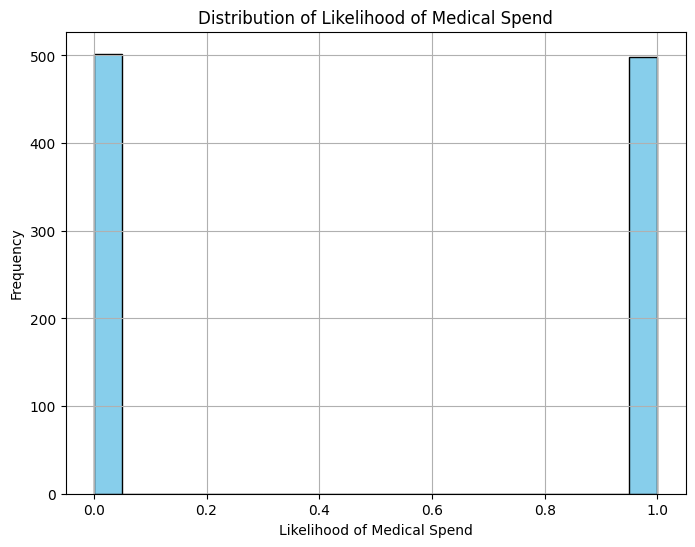

In [109]:
# Plotting the distribution of the target variable 'y'
plt.figure(figsize=(8, 6))
plt.hist(y, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Likelihood of Medical Spend')
plt.ylabel('Frequency')
plt.title('Distribution of Likelihood of Medical Spend')
plt.grid(True)
plt.show()

### XGboost (Classification)

In [111]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Assuming 'X' contains the clinical and social variables, and 'y' is the target variable (likelihood of medical spend)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
report = classification_report(y_test, predictions)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"Classification Report:\n{report}")

# Feature importance
feature_importance = model.feature_importances_
# Visualize feature importance or use it for further analysis


Accuracy: 0.8966666666666666
ROC-AUC: 0.9482222222222223
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       150
           1       0.90      0.89      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



### Visuizalize the top 20 features

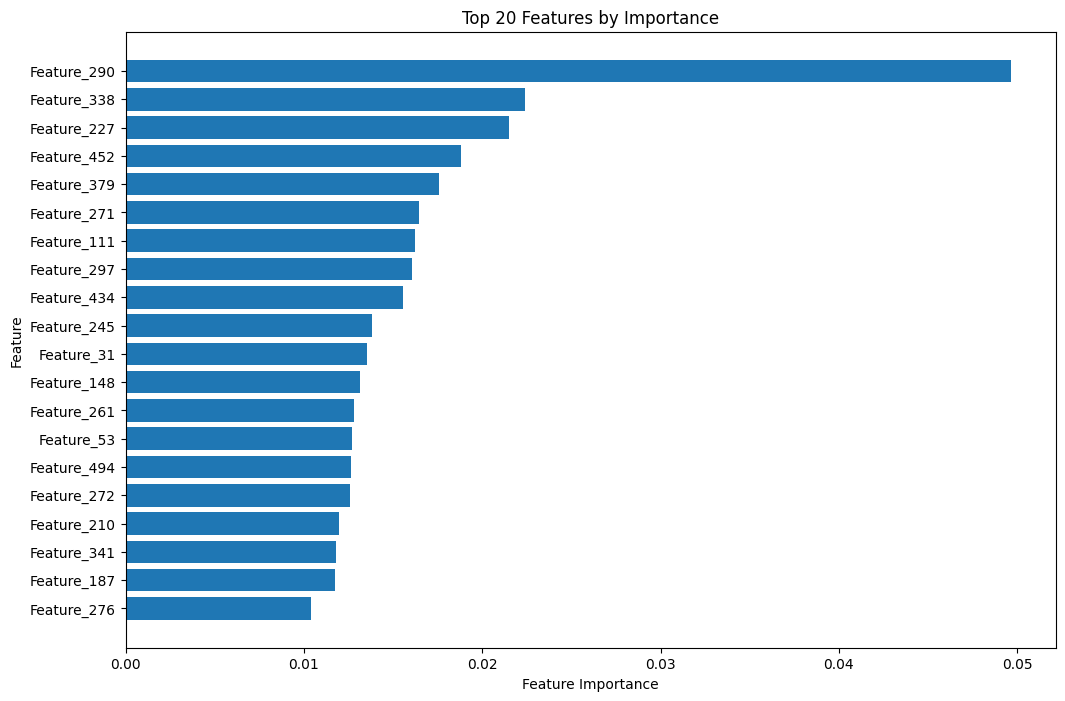

In [112]:
import matplotlib.pyplot as plt

# Assuming 'feature_importance' contains the feature importance scores obtained from XGBoost

# Creating a DataFrame with feature names and their importance scores
feature_names = [f"Feature_{i}" for i in range(1, len(feature_importance) + 1)]
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sorting features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


m

# XGBoost Regression

### Synthetic Data

In [ ]:

from sklearn.datasets import make_regression

# Generating synthetic data with 500 features and 1000 samples for regression
num_samples = 1000
num_features = 500

# Creating synthetic features and target variable using make_regression
X, y = make_regression(n_samples=num_samples, n_features=num_features, noise=0.1, random_state=42)

# Creating a DataFrame for the synthetic dataset
columns = [f"Feature_{i}" for i in range(1, num_features + 1)]
df = pd.DataFrame(X, columns=columns)
df['Likelihood_Medical_Spend'] = y

# Displaying the first few rows of the generated dataset
print(df.head(3))


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -0.442636  -0.876895  -0.995941   0.330167   0.534750   0.986931   
1  -1.635920   1.446576  -1.353243   1.961347   0.678335   0.300356   
2   0.003064   0.881361  -0.132806   1.599704   0.517973   1.476754   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_492  Feature_493  \
0   1.263296   0.375449  -1.019572   -0.064910  ...    -0.436163    -0.924725   
1  -0.609214  -1.073507   0.200249    2.246305  ...     0.060177    -1.105917   
2  -2.091960  -1.588644  -0.479050    0.830550  ...    -0.736197     0.638517   

   Feature_494  Feature_495  Feature_496  Feature_497  Feature_498  \
0     0.636478     0.557722    -0.865929    -0.315045    -1.861442   
1    -0.595737    -1.435306    -0.420819    -0.078512     0.806003   
2     1.061132    -0.275323     0.481070     0.599263     1.327500   

   Feature_499  Feature_500  Likelihood_Medical_Spend  
0    -2.093542     0.854650               -189.148997

### XGBoost Regression model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'X' contains the clinical and social variables, and 'y' is the target variable (Likelihood_Medical_Spend)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing XGBoost regressor
model = xgb.XGBRegressor()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Printing evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 8532.251004935271
R-squared (R2): 0.6804051314692618


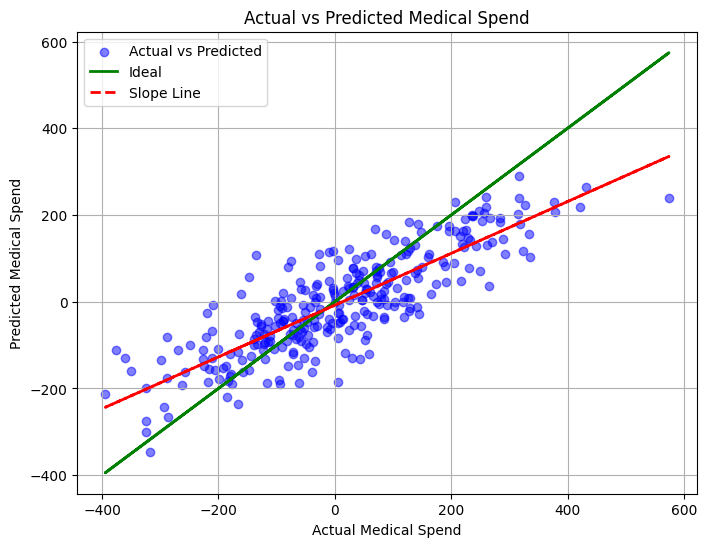

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5, label='Actual vs Predicted')
plt.plot(y_test, y_test, color='green', label='Ideal', linewidth=2)  # Ideal line

# Calculate and plot the slope line
slope, intercept = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, slope * y_test + intercept, color='red', linestyle='--', label='Slope Line', linewidth=2)

plt.xlabel('Actual Medical Spend')
plt.ylabel('Predicted Medical Spend')
plt.title('Actual vs Predicted Medical Spend')
plt.legend()
plt.grid(True)
plt.show()

# Realistic Data

The distribution of the synthetic medical spending data I generated follows a right-skewed distribution. Specifically, a log-normal distribution with parameters set to achieve a mode around 1000.

The formula for the probability density function (PDF) of a log-normal distribution is:

$$ f(x) = \frac{1}{x \cdot \sigma \sqrt{2\pi}} \cdot e^{-\frac{(\ln(x) - \mu)^2}{2\sigma^2}} $$



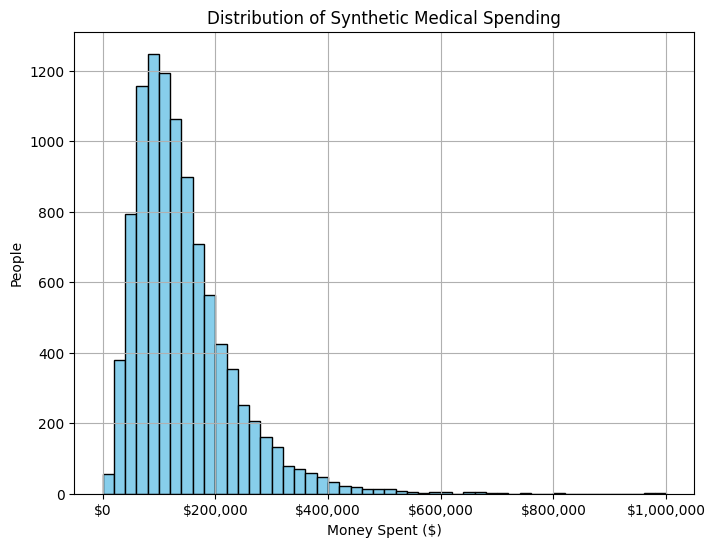

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generating synthetic data with a log-normal distribution for medical spending
num_samples = 10000

# Parameters for log-normal distribution to achieve mode around 1000
mode = 1000
sigma = 0.5  # Adjust sigma for the desired spread

# Calculate mean based on mode and sigma
mean = np.log(mode) - (sigma ** 2) / 2

# Creating a log-normal distribution
log_normal_values = np.random.lognormal(mean, sigma, num_samples)

# Scaling and shifting the values to range between 0 and 1 million
min_value = 0
max_value = 1000000
scaled_values = (log_normal_values - np.min(log_normal_values)) / (np.max(log_normal_values) - np.min(log_normal_values))
scaled_values = scaled_values * (max_value - min_value) + min_value

# Creating a DataFrame for the synthetic dataset
df = pd.DataFrame({'Likelihood_Medical_Spend': scaled_values})

# Plotting the distribution of synthetic medical spending data
plt.figure(figsize=(8, 6))
plt.hist(df['Likelihood_Medical_Spend'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Money Spent ($)')
plt.ylabel('People')
plt.title('Distribution of Synthetic Medical Spending')
plt.xticks(np.linspace(0, 1000000, num=6), ['$0', '$200,000', '$400,000', '$600,000', '$800,000', '$1,000,000'])
plt.grid(True)
plt.show()


### Creating Synthetic X Variables

In [ ]:
# Generating synthetic X data related to Y
num_variables = 50

# Creating X data based on a relationship with Y
X_real = np.random.randn(num_samples, num_variables) + 0.3 * Y[:, np.newaxis]

# Displaying the shape of the generated X data
print(f"Shape of X data: {X_real.shape}")


Shape of X data: (10000, 50)


### XGBoost Regression

In [118]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'X' contains the clinical and social variables, and 'y' is the target variable (Likelihood_Medical_Spend)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_real, Y_real, test_size=0.3, random_state=42)

# Initializing XGBoost regressor
model_real = xgb.XGBRegressor()

# Training the model
model_real.fit(X_train, y_train)

# Making predictions on the test set
predictions = model_real.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Printing evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 100645038.88595082
R-squared (R2): 0.9843308495734532


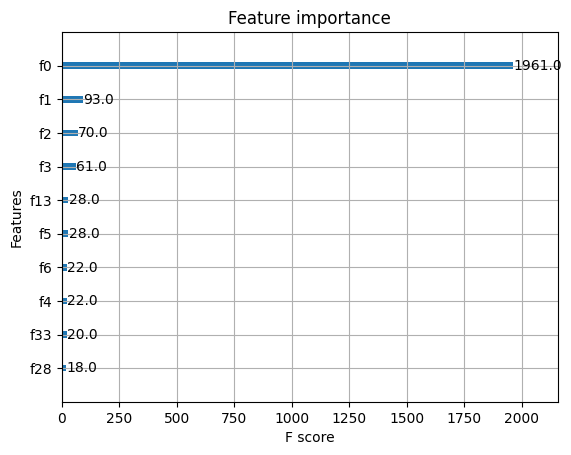

In [119]:
# Plotting feature importance
xgb.plot_importance(model_real, max_num_features=10)  # Change max_num_features as needed
plt.show()

### Comparing Predicted vs Actual

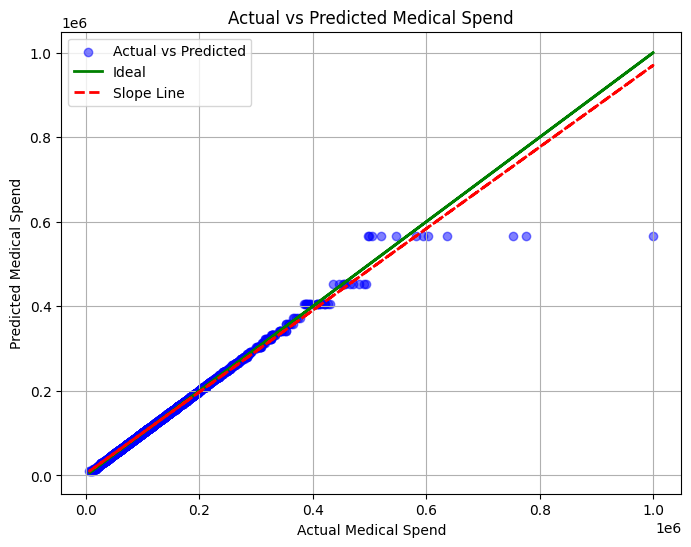

In [120]:
# Make predictions on the test set
predictions = model_real.predict(X_test)

# Extract values from DataFrame columns to convert to NumPy arrays
y_test_values = y_test['Likelihood_Medical_Spend'].values
predictions_values = predictions.flatten()

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_values, predictions_values, color='blue', alpha=0.5, label='Actual vs Predicted')
plt.plot(y_test_values, y_test_values, color='green', label='Ideal', linewidth=2)  # Ideal line

# Calculate and plot the slope line
slope, intercept = np.polyfit(y_test_values, predictions_values, 1)
plt.plot(y_test_values, slope * y_test_values + intercept, color='red', linestyle='--', label='Slope Line', linewidth=2)

plt.xlabel('Actual Medical Spend')
plt.ylabel('Predicted Medical Spend')
plt.title('Actual vs Predicted Medical Spend')
plt.legend()
plt.grid(True)
plt.show()
